### 4) Convolutional Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
from tensorflow.keras import datasets, layers, models

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [5]:
#optimizer 
opt = tf.keras.optimizers.SGD(learning_rate=0.016,momentum=1e-3, nesterov=False, name='SGD')
#high momentum was overfitting

#compile
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#train
history = model.fit(train_images, train_labels,batch_size=50, epochs=30, 
                    validation_data=(test_images, test_labels))

Epoch 1/30
1000/1000 [==============================] - 31s 31ms/step - loss: 2.1480 - accuracy: 0.2005 - val_loss: 1.9160 - val_accuracy: 0.3039
Epoch 2/30
1000/1000 [==============================] - 30s 30ms/step - loss: 1.7977 - accuracy: 0.3482 - val_loss: 1.7024 - val_accuracy: 0.3854
Epoch 3/30
1000/1000 [==============================] - 30s 30ms/step - loss: 1.5896 - accuracy: 0.4260 - val_loss: 1.4851 - val_accuracy: 0.4691
Epoch 4/30
1000/1000 [==============================] - 30s 30ms/step - loss: 1.4759 - accuracy: 0.4660 - val_loss: 1.4727 - val_accuracy: 0.4683
Epoch 5/30
1000/1000 [==============================] - 30s 30ms/step - loss: 1.3915 - accuracy: 0.4992 - val_loss: 1.3651 - val_accuracy: 0.5174
Epoch 6/30
1000/1000 [==============================] - 30s 30ms/step - loss: 1.3148 - accuracy: 0.5325 - val_loss: 1.2698 - val_accuracy: 0.5442
Epoch 7/30
1000/1000 [==============================] - 31s 31ms/step - loss: 1.2517 - accuracy: 0.5548 - val_loss: 1.2355 -

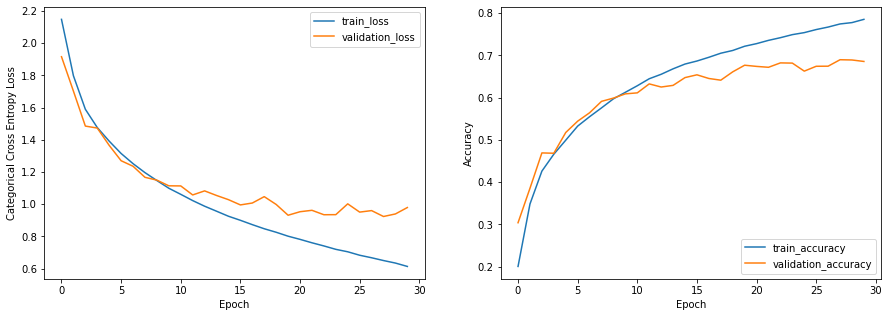

In [18]:
fig,axes = plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history.history['loss'], label='train_loss')
axes[0].plot(history.history['val_loss'], label = 'validation_loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Categorical Cross Entropy Loss')
axes[0].legend(loc='upper right')

axes[1].plot(history.history['accuracy'], label='train_accuracy')
axes[1].plot(history.history['val_accuracy'], label = 'validation_accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='lower right');